<a href="https://colab.research.google.com/github/showpiecep/ML_labs/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('iris.data',header=None)

In [ ]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum()) #количество наблюдений, который были неправильно определены

6


АТРИБУТЫ GaussianNB:

class_count_: ndarray of shape (n_classes,)
количество обучающих выборок, наблюдаемых в каждом классе.

class_prior_: ndarray of shape (n_classes,)
вероятность каждого класса.

classes_: ndarray of shape (n_classes,)
метки классов, известные классификатору.

epsilon_: float
абсолютное аддитивное значение к отклонениям.

n_features_in_: int
Количество функций, наблюдаемых во время подгонки .

feature_names_in_: ndarray of shape (n_features_in_,)
Имена функций, видимых во время подгонки . Определяется только в том случае, если X все имена компонентов являются строками.

var_: ndarray of shape (n_classes, n_features)
Дисперсия каждой функции по классам.

theta_: ndarray of shape (n_classes, n_features)
среднее значение каждой функции в классе.

In [ ]:
gnb.score(X_test, y_test)

0.92

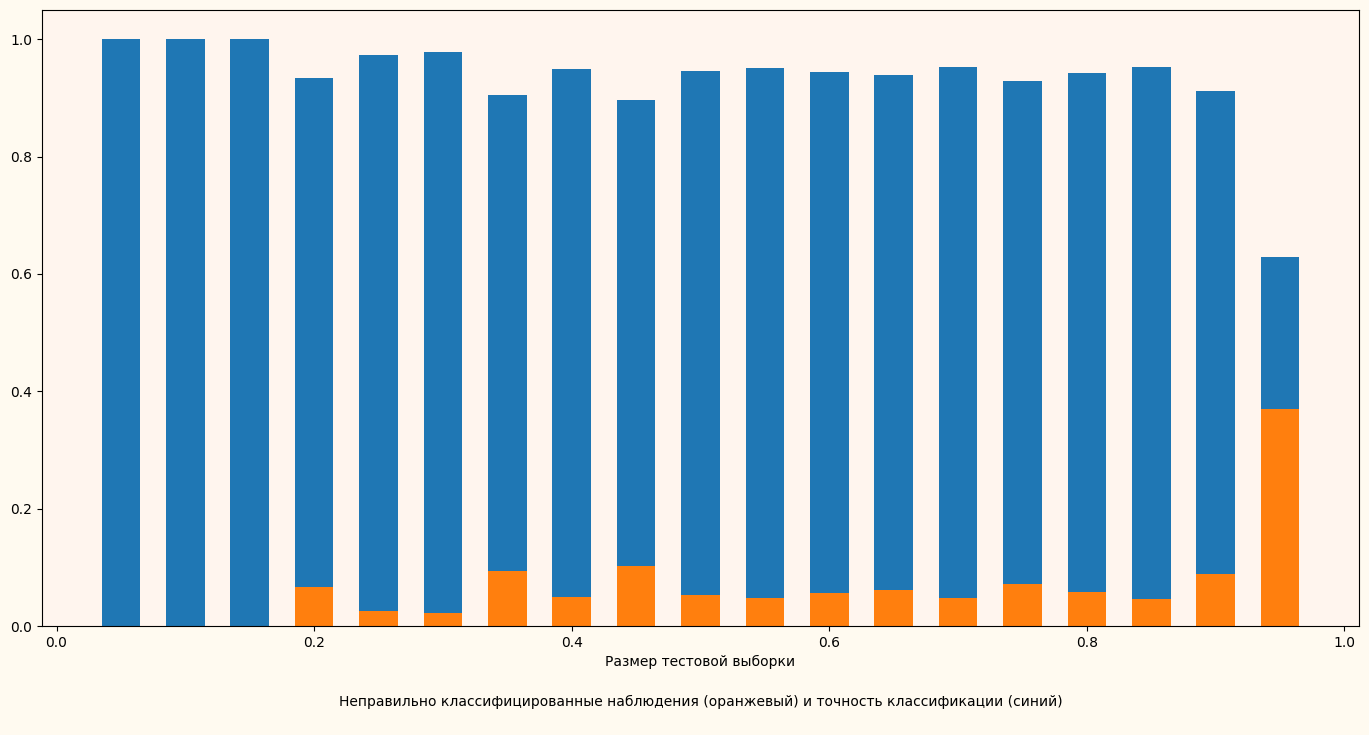

In [ ]:
import matplotlib.pyplot as plt

size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots()

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_figwidth(17)
fig.set_figheight(8)
fig.set_facecolor('floralwhite')

plt.xlabel('Размер тестовой выборки')

plt.figtext(0.3, -0.01, 'Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)\n')

plt.show()

Чем меньше тестовая выборка, тем может быть наибольшее значение ошибок, выдаваемых классификатором, т.к. если ошибок одинаковое количество, но при этом размер выборок будет разный, то и соответственно loss'ы будут разные



In [ ]:
'''Наивный байесовский классификатор для полиномиальных моделей.
 Полиномиальный наивный байесовский классификатор подходит для классификации
 с дискретными функциями (например, количество слов для классификации текста).
 Полиномиальное распределение обычно требует целочисленного подсчета признаков.'''
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(f'Количество наблюдений, который были неправильно определены {(y_test != y_pred).sum()}')
print(f'Score {clf.score(X_test, y_test)}')

Количество наблюдений, который были неправильно определены 49
Score 0.6573426573426573


In [ ]:
'''Дополняющий наивный байесовский классификатор был разработан
 для исправления «строгих допущений», сделанных стандартным полиномиальным
 наивным байесовским классификатором. Он особенно подходит для несбалансированных наборов данных.'''
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB(force_alpha=True)
y_pred = cnb.fit(X_train, y_train).predict(X_test)
print(f'Количество наблюдений, который были неправильно определены {(y_test != y_pred).sum()}')
print(f'Score {cnb.score(X_test, y_test)}')

Количество наблюдений, который были неправильно определены 49
Score 0.6573426573426573


In [ ]:
'''Наивный байесовский классификатор для многомерных моделей Бернулли.
 Как и MultinomialNB, этот классификатор подходит для дискретных данных.
 Разница в том, что в то время как MultinomialNB работает с подсчетом вхождений,
 BernoulliNB предназначен для бинарных/булевых функций.'''
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(force_alpha=True)
y_pred = bnb.fit(X_train, y_train).predict(X_test)
print(f'Количество наблюдений, который были неправильно определены {(y_test != y_pred).sum()}')
print(f'Score {bnb.score(X_test, y_test)}')

Количество наблюдений, который были неправильно определены 96
Score 0.32867132867132864


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())

48


In [ ]:
clf.score(X_test, y_test)

0.6643356643356644

In [ ]:
clf.get_n_leaves()

3

In [ ]:
clf.get_depth()

2

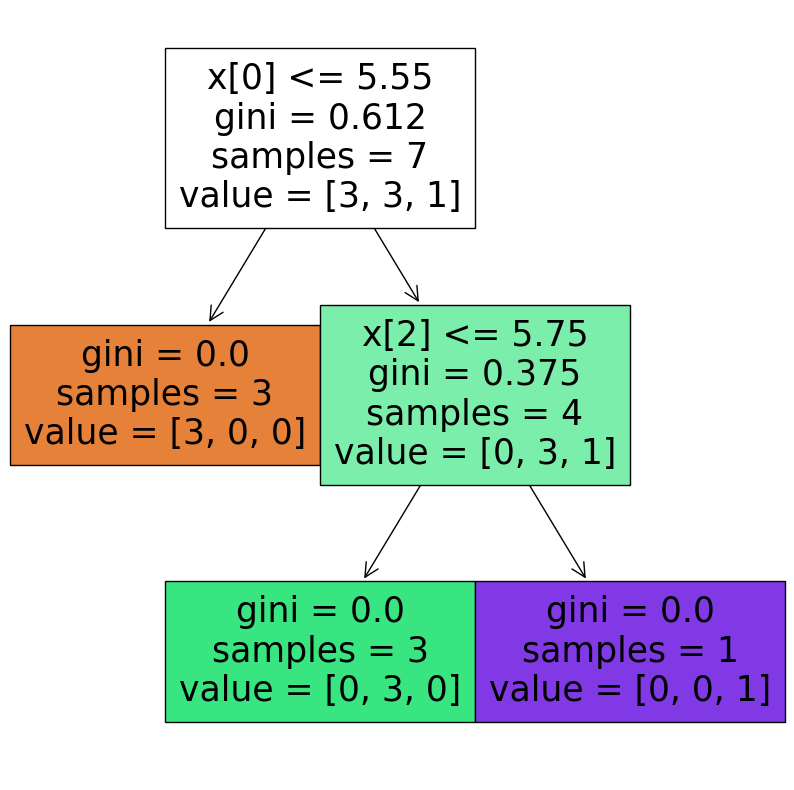

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(1,1,figsize = (10,10))
tree.plot_tree(clf, filled = True)
plt.show()

Показанные количества выборок взвешиваются с учетом всех возможных значений sample_weights.

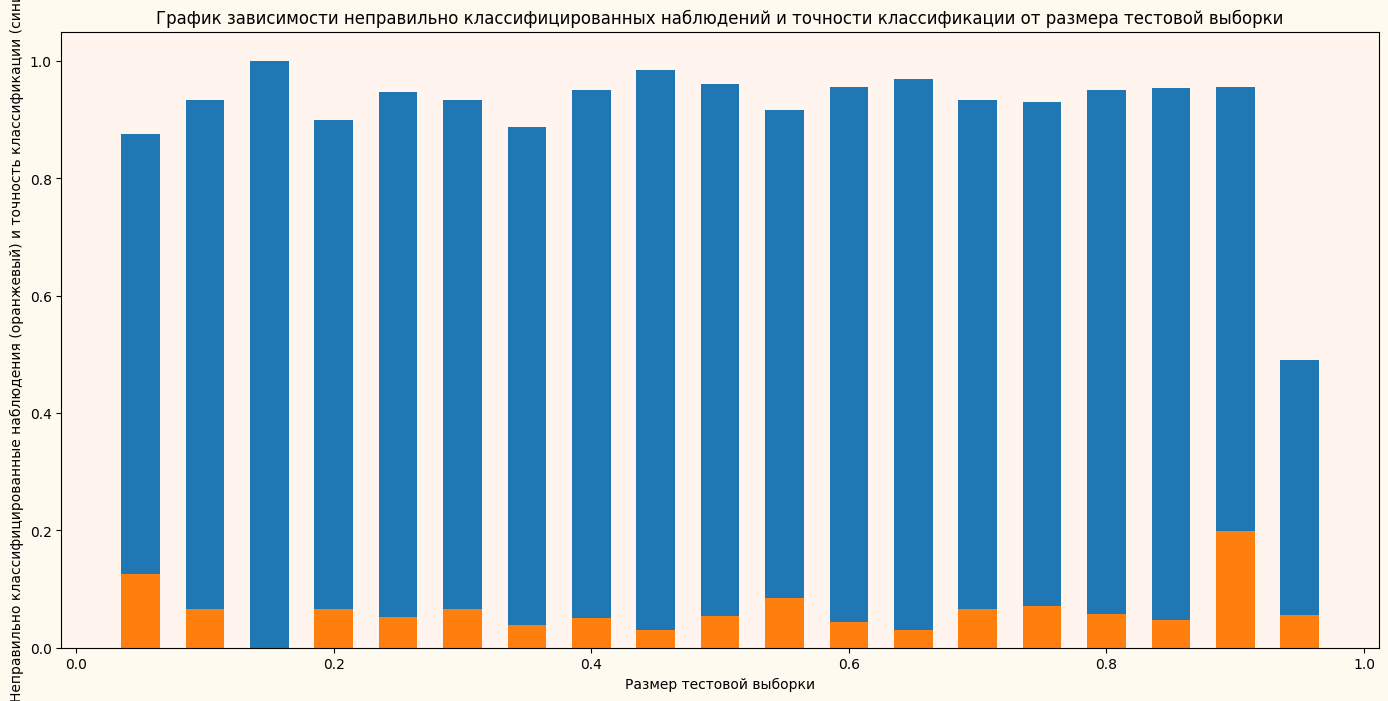

In [ ]:
size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    gnb = tree.DecisionTreeClassifier()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots()

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_figwidth(17)
fig.set_figheight(8)
fig.set_facecolor('floralwhite')

plt.xlabel('Размер тестовой выборки')
plt.ylabel('Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)')
plt.title(
    label='График зависимости неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки',
    fontweight=12)

plt.show()

Чем меньше тестовая выборка, тем может быть наибольшее значение ошибок, выдаваемых классификатором, т.к. если ошибок одинаковое количество, но при этом размер выборок будет разный, то и соответственно loss'ы будут разные

In [ ]:
from random import randint

criterion_parameters = ('gini', 'entropy', 'log_loss')
splitter_parameter = ('best', 'random')
for parameter in criterion_parameters:
    sp_par_random = splitter_parameter[randint(0, 1)]
    max_dp_random = randint(5, 40)
    min_samples_split_random = randint(5, 40)
    min_samples_leaf_random = randint(5, 40)

    gnb = tree.DecisionTreeClassifier(criterion=parameter, splitter=sp_par_random, max_depth=max_dp_random,
                                      min_samples_split=min_samples_split_random,
                                      min_samples_leaf=min_samples_leaf_random)
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    print(f'При criterion: {parameter}, splitter: {sp_par_random}, max_depth: {max_dp_random}, min_samples_split: {min_samples_split_random}, min_samples_leaf: {min_samples_leaf_random} \n точность классификации {gnb.fit(X_train, y_train).score(X_test, y_test) * 100}%, количество листьев: {gnb.get_n_leaves()}, глубина: {gnb.get_depth()}\n')

При criterion: gini, splitter: best, max_depth: 33, min_samples_split: 26, min_samples_leaf: 7 
 точность классификации 31.46853146853147%, количество листьев: 1, глубина: 0

При criterion: entropy, splitter: random, max_depth: 17, min_samples_split: 35, min_samples_leaf: 7 
 точность классификации 31.46853146853147%, количество листьев: 1, глубина: 0

При criterion: log_loss, splitter: random, max_depth: 13, min_samples_split: 14, min_samples_leaf: 6 
 точность классификации 31.46853146853147%, количество листьев: 1, глубина: 0

